In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# (Hack) add the parent directory to the path in order to be able to import the posCouche module 
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from posCouche.formeTS import vacuum_vessel
from posCouche.ic_utils import IC_resonance_radius, IC_resonance_radius_ripple

from ipywidgets import interact, interactive
import ipywidgets

In [3]:
# IPython notebook widgets
Itor_widget = ipywidgets.IntSlider(value=1250, min=0, max=1250, step=1, description='Itor [A]')
freq_widget = ipywidgets.FloatSlider(value=55.0, min=45, max=65, step=0.1, description='Frequency [MHz]')
harmonic_widget = ipywidgets.IntSlider(value=1, min=1, max=3, description='Harmonic')
species_widget = ipywidgets.Dropdown(options=['H','D','T','3He','4He'], value='H', description='Species')

<IPython.core.display.Javascript object>


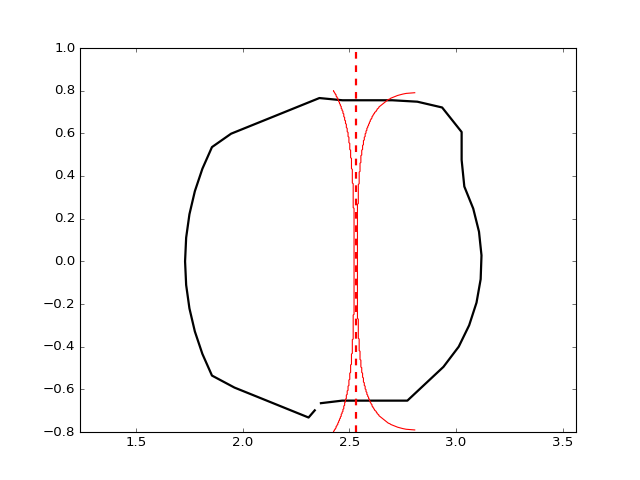

In [4]:
# Initialize the figure and draw some plots to get the Line objects
R_vv, Z_vv = vacuum_vessel(shot=50001)
fig, ax = plt.subplots()
ax.plot(R_vv, Z_vv, 'k', lw=2)
ax.axis('equal')

z = np.linspace(-0.8, +0.8, 500)
R, Z = np.meshgrid(np.linspace(1.5, 3.5, 500), z)

Rc_ripple_p = IC_resonance_radius_ripple(R,Z,ep=+1)
Rc_ripple_m = IC_resonance_radius_ripple(R,Z,ep=-1)

line_Rc = ax.axvline(IC_resonance_radius(), color='r', lw=2, ls='--')
line_Rc_p, = ax.plot(Rc_ripple_p, z, 'r')
line_Rc_m, = ax.plot(Rc_ripple_m, z, 'r')

In [5]:
# continuous_update = False : restricts executions to mouse release events
@interact(Itor=Itor_widget, f=freq_widget, n=harmonic_widget, species=species_widget, continuous_update=False)
def set_Rc(Itor, f, n, species):
    Rc = IC_resonance_radius(Itor=Itor, f=f, species=species, n=n)
    Rc_ripple_p = IC_resonance_radius_ripple(R ,Z, Itor=Itor, freq=f, species=species, n=n, ep=+1)
    Rc_ripple_m = IC_resonance_radius_ripple(R, Z, Itor=Itor, freq=f, species=species, n=n, ep=-1)
    line_Rc.set_data([Rc, Rc], [0, 1])
    line_Rc_p.set_data(Rc_ripple_p, z)
    line_Rc_m.set_data(Rc_ripple_m, z)